![title](lstm_arch.jpg)

### One-to-one

you might use a Dense layer as you are not processing sequences:

model.add(Dense(output_size, input_shape=input_shape))




### One-to-many

this option is not supported well as chaining models is not very easy in Keras so the following version is the easiest one:

model.add(RepeatVector(number_of_times, input_shape=input_shape))
model.add(LSTM(output_size, return_sequences=True))





### Many-to-one

actually your code snippet is (allmost) example of this approach:

model = Sequential()
model.add(LSTM(1, input_shape=(timesteps, data_dim)))







### Many-to-many

This is the easiest snippet when length of input and output matches the number of reccurent steps:

model = Sequential()
model.add(LSTM(1, input_shape=(timesteps, data_dim), return_sequences=True))

Many-to-many when number of steps differ from input/output length: this is freaky hard in Keras. There are no easy code snippets to code that.

# Many-to-one

output sum of number

In [2]:
import numpy as np
x_train = np.random.randint(1,99,50000).reshape(10000,5,1)
y_train = np.sum(x_train,axis=1)
x_test = np.random.randint(1,99,5000).reshape(1000,5,1)
y_test = np.sum(x_test,axis=1)
x_train.shape, y_train.shape

((10000, 5, 1), (10000, 1))

In [3]:
x_train[0], y_train[0]

(array([[48],
        [38],
        [28],
        [58],
        [47]]), array([219]))

In [4]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM

import numpy as np
from random import seed
from random import randint
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from sklearn.metrics import mean_squared_error

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
model = Sequential()  
model.add(LSTM(10, input_shape=(5, 1)))  
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train, nb_epoch=1000, batch_size=50, verbose=2,validation_data=(x_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 10000 samples, validate on 1000 samples
Epoch 1/1000
 - 2s - loss: 65121.0353 - acc: 0.0000e+00 - val_loss: 63825.5717 - val_acc: 0.0000e+00
Epoch 2/1000
 - 1s - loss: 62729.2827 - acc: 0.0000e+00 - val_loss: 61745.2406 - val_acc: 0.0000e+00
Epoch 3/1000
 - 1s - loss: 61118.9977 - acc: 0.0000e+00 - val_loss: 60483.1777 - val_acc: 0.0000e+00
Epoch 4/1000
 - 1s - loss: 59924.9458 - acc: 0.0000e+00 - val_loss: 59338.0672 - val_acc: 0.0000e+00
Epoch 5/1000
 - 1s - loss: 58811.3501 - acc: 0.0000e+00 - val_loss: 58250.7869 - val_acc: 0.0000e+00
Epoch 6/1000
 - 1s - loss: 57742.8000 - acc: 0.0000e+00 - val_loss: 57199.4896 - val_acc: 0.0000e+00
Epoch 7/1000
 - 1s - loss: 56705.4230 - acc: 0.0000e+00 - val_loss: 56175.6832 - val_acc: 0.0000e+00
Epoch 8/1000
 - 1s - loss: 55692.2629 - acc: 0.0000e+00 - val_loss: 55173.5188 - val_acc: 0.0000e+00
Epoch 9/1000
 - 1s - loss: 54699.5512 - acc: 0.0000e+00 - val_loss: 54189.1967 - val_acc: 0.0000e+00
Epoch 10/1000
 - 1s - loss: 53724.5129 - a

Epoch 83/1000
 - 1s - loss: 9457.2027 - acc: 0.0024 - val_loss: 9290.5583 - val_acc: 0.0040
Epoch 84/1000
 - 1s - loss: 9177.4731 - acc: 0.0036 - val_loss: 9015.4273 - val_acc: 0.0020
Epoch 85/1000
 - 1s - loss: 8906.1768 - acc: 0.0033 - val_loss: 8747.9492 - val_acc: 0.0070
Epoch 86/1000
 - 1s - loss: 8643.0202 - acc: 0.0044 - val_loss: 8488.9079 - val_acc: 0.0050
Epoch 87/1000
 - 1s - loss: 8387.9639 - acc: 0.0037 - val_loss: 8238.0072 - val_acc: 0.0050
Epoch 88/1000
 - 1s - loss: 8141.1602 - acc: 0.0026 - val_loss: 7995.2389 - val_acc: 0.0070
Epoch 89/1000
 - 1s - loss: 7902.4343 - acc: 0.0027 - val_loss: 7760.4008 - val_acc: 0.0030
Epoch 90/1000
 - 1s - loss: 7671.6016 - acc: 0.0042 - val_loss: 7533.8959 - val_acc: 0.0080
Epoch 91/1000
 - 1s - loss: 7448.7987 - acc: 0.0040 - val_loss: 7314.5826 - val_acc: 0.0060
Epoch 92/1000
 - 1s - loss: 7234.0606 - acc: 0.0053 - val_loss: 7104.3384 - val_acc: 0.0060
Epoch 93/1000
 - 1s - loss: 7027.5051 - acc: 0.0043 - val_loss: 6901.2112 - val_

 - 1s - loss: 169.4053 - acc: 0.0989 - val_loss: 153.4884 - val_acc: 0.0930
Epoch 173/1000
 - 1s - loss: 159.9898 - acc: 0.1081 - val_loss: 141.6136 - val_acc: 0.1070
Epoch 174/1000
 - 1s - loss: 152.7855 - acc: 0.1037 - val_loss: 136.2648 - val_acc: 0.1080
Epoch 175/1000
 - 1s - loss: 144.8625 - acc: 0.1034 - val_loss: 130.5410 - val_acc: 0.0780
Epoch 176/1000
 - 1s - loss: 136.5426 - acc: 0.1083 - val_loss: 120.8767 - val_acc: 0.1210
Epoch 177/1000
 - 1s - loss: 130.5211 - acc: 0.1061 - val_loss: 114.1306 - val_acc: 0.1340
Epoch 178/1000
 - 1s - loss: 122.8262 - acc: 0.1106 - val_loss: 107.7102 - val_acc: 0.1400
Epoch 179/1000
 - 1s - loss: 116.6261 - acc: 0.1128 - val_loss: 103.7829 - val_acc: 0.1010
Epoch 180/1000
 - 1s - loss: 110.4103 - acc: 0.1140 - val_loss: 99.4995 - val_acc: 0.0910
Epoch 181/1000
 - 1s - loss: 103.7451 - acc: 0.1215 - val_loss: 92.5231 - val_acc: 0.1200
Epoch 182/1000
 - 1s - loss: 98.6740 - acc: 0.1264 - val_loss: 87.8889 - val_acc: 0.1180
Epoch 183/1000
 - 

Epoch 265/1000
 - 1s - loss: 6.6413 - acc: 0.2526 - val_loss: 6.4913 - val_acc: 0.2590
Epoch 266/1000
 - 1s - loss: 6.5877 - acc: 0.2576 - val_loss: 5.6464 - val_acc: 0.2630
Epoch 267/1000
 - 1s - loss: 6.1724 - acc: 0.2642 - val_loss: 4.5366 - val_acc: 0.3550
Epoch 268/1000
 - 1s - loss: 6.1927 - acc: 0.2580 - val_loss: 5.6920 - val_acc: 0.2100
Epoch 269/1000
 - 1s - loss: 6.1622 - acc: 0.2418 - val_loss: 4.7111 - val_acc: 0.3310
Epoch 270/1000
 - 1s - loss: 6.0413 - acc: 0.2599 - val_loss: 4.4559 - val_acc: 0.3240
Epoch 271/1000
 - 1s - loss: 5.2867 - acc: 0.3105 - val_loss: 6.5432 - val_acc: 0.1380
Epoch 272/1000
 - 1s - loss: 5.2940 - acc: 0.2994 - val_loss: 4.1801 - val_acc: 0.3650
Epoch 273/1000
 - 1s - loss: 6.0548 - acc: 0.2518 - val_loss: 4.2972 - val_acc: 0.3970
Epoch 274/1000
 - 1s - loss: 5.4436 - acc: 0.2930 - val_loss: 4.0188 - val_acc: 0.3910
Epoch 275/1000
 - 1s - loss: 6.5577 - acc: 0.2129 - val_loss: 5.3882 - val_acc: 0.2000
Epoch 276/1000
 - 1s - loss: 5.0153 - acc: 

 - 1s - loss: 2.6415 - acc: 0.3200 - val_loss: 2.9613 - val_acc: 0.1450
Epoch 360/1000
 - 1s - loss: 2.6224 - acc: 0.3277 - val_loss: 1.5875 - val_acc: 0.4540
Epoch 361/1000
 - 1s - loss: 2.3048 - acc: 0.3676 - val_loss: 1.7793 - val_acc: 0.3500
Epoch 362/1000
 - 1s - loss: 2.5567 - acc: 0.3326 - val_loss: 1.6253 - val_acc: 0.4050
Epoch 363/1000
 - 1s - loss: 2.2990 - acc: 0.3560 - val_loss: 3.0864 - val_acc: 0.1120
Epoch 364/1000
 - 1s - loss: 2.6362 - acc: 0.3052 - val_loss: 1.9773 - val_acc: 0.3680
Epoch 365/1000
 - 1s - loss: 2.3198 - acc: 0.3527 - val_loss: 1.4443 - val_acc: 0.4810
Epoch 366/1000
 - 1s - loss: 2.5039 - acc: 0.3300 - val_loss: 1.5100 - val_acc: 0.4580
Epoch 367/1000
 - 1s - loss: 2.4314 - acc: 0.3338 - val_loss: 1.9059 - val_acc: 0.2760
Epoch 368/1000
 - 1s - loss: 2.1496 - acc: 0.3720 - val_loss: 1.9070 - val_acc: 0.2860
Epoch 369/1000
 - 1s - loss: 2.8745 - acc: 0.2984 - val_loss: 2.1579 - val_acc: 0.4230
Epoch 370/1000
 - 1s - loss: 2.7725 - acc: 0.2757 - val_lo

Epoch 454/1000
 - 1s - loss: 1.6271 - acc: 0.3767 - val_loss: 5.2403 - val_acc: 0.0340
Epoch 455/1000
 - 1s - loss: 1.6493 - acc: 0.3508 - val_loss: 1.3432 - val_acc: 0.3630
Epoch 456/1000
 - 1s - loss: 1.7558 - acc: 0.3369 - val_loss: 1.3396 - val_acc: 0.3060
Epoch 457/1000
 - 1s - loss: 1.5778 - acc: 0.4086 - val_loss: 2.1031 - val_acc: 0.1610
Epoch 458/1000
 - 1s - loss: 1.8852 - acc: 0.3221 - val_loss: 1.1282 - val_acc: 0.4420
Epoch 459/1000
 - 1s - loss: 1.6025 - acc: 0.3837 - val_loss: 0.8809 - val_acc: 0.5460
Epoch 460/1000
 - 1s - loss: 1.4428 - acc: 0.4068 - val_loss: 2.0281 - val_acc: 0.2160
Epoch 461/1000
 - 1s - loss: 2.0531 - acc: 0.3100 - val_loss: 1.0927 - val_acc: 0.4750
Epoch 462/1000
 - 1s - loss: 1.3617 - acc: 0.4283 - val_loss: 1.2201 - val_acc: 0.3820
Epoch 463/1000
 - 1s - loss: 1.5308 - acc: 0.3748 - val_loss: 0.8508 - val_acc: 0.6060
Epoch 464/1000
 - 1s - loss: 1.5898 - acc: 0.3738 - val_loss: 2.7596 - val_acc: 0.0630
Epoch 465/1000
 - 1s - loss: 1.7497 - acc: 

 - 1s - loss: 1.2208 - acc: 0.4269 - val_loss: 1.3368 - val_acc: 0.2480
Epoch 549/1000
 - 1s - loss: 1.5848 - acc: 0.3335 - val_loss: 0.8213 - val_acc: 0.4960
Epoch 550/1000
 - 1s - loss: 1.3764 - acc: 0.4009 - val_loss: 0.7669 - val_acc: 0.4980
Epoch 551/1000
 - 1s - loss: 1.8633 - acc: 0.3273 - val_loss: 0.9144 - val_acc: 0.4280
Epoch 552/1000
 - 1s - loss: 1.3079 - acc: 0.4352 - val_loss: 0.8225 - val_acc: 0.4430
Epoch 553/1000
 - 1s - loss: 1.3124 - acc: 0.4088 - val_loss: 2.3294 - val_acc: 0.1420
Epoch 554/1000
 - 1s - loss: 1.2828 - acc: 0.4182 - val_loss: 0.5730 - val_acc: 0.6280
Epoch 555/1000
 - 1s - loss: 1.2382 - acc: 0.4260 - val_loss: 0.6504 - val_acc: 0.5500
Epoch 556/1000
 - 1s - loss: 1.8012 - acc: 0.3467 - val_loss: 0.6302 - val_acc: 0.5670
Epoch 557/1000
 - 1s - loss: 1.1324 - acc: 0.4499 - val_loss: 1.5441 - val_acc: 0.2730
Epoch 558/1000
 - 1s - loss: 1.7701 - acc: 0.3554 - val_loss: 1.1206 - val_acc: 0.3020
Epoch 559/1000
 - 1s - loss: 1.5365 - acc: 0.3421 - val_lo

Epoch 643/1000
 - 1s - loss: 1.5697 - acc: 0.3809 - val_loss: 0.7098 - val_acc: 0.5400
Epoch 644/1000
 - 1s - loss: 1.0539 - acc: 0.4386 - val_loss: 0.5443 - val_acc: 0.5610
Epoch 645/1000
 - 1s - loss: 1.6558 - acc: 0.3486 - val_loss: 0.9389 - val_acc: 0.3500
Epoch 646/1000
 - 1s - loss: 1.0051 - acc: 0.4512 - val_loss: 0.5702 - val_acc: 0.5510
Epoch 647/1000
 - 1s - loss: 0.8619 - acc: 0.4839 - val_loss: 0.8033 - val_acc: 0.4010
Epoch 648/1000
 - 1s - loss: 1.5126 - acc: 0.3762 - val_loss: 0.8807 - val_acc: 0.5890
Epoch 649/1000
 - 1s - loss: 1.8577 - acc: 0.3601 - val_loss: 0.5215 - val_acc: 0.6000
Epoch 650/1000
 - 1s - loss: 0.8330 - acc: 0.4894 - val_loss: 0.7233 - val_acc: 0.4520
Epoch 651/1000
 - 1s - loss: 1.3617 - acc: 0.3832 - val_loss: 0.5705 - val_acc: 0.5360
Epoch 652/1000
 - 1s - loss: 0.9890 - acc: 0.4647 - val_loss: 3.2107 - val_acc: 0.0360
Epoch 653/1000
 - 1s - loss: 1.1142 - acc: 0.4125 - val_loss: 1.3882 - val_acc: 0.3810
Epoch 654/1000
 - 1s - loss: 1.0508 - acc: 

 - 1s - loss: 1.0789 - acc: 0.4331 - val_loss: 0.3732 - val_acc: 0.6820
Epoch 738/1000
 - 1s - loss: 1.9298 - acc: 0.3909 - val_loss: 0.4458 - val_acc: 0.6620
Epoch 739/1000
 - 1s - loss: 0.9173 - acc: 0.4502 - val_loss: 0.5116 - val_acc: 0.5950
Epoch 740/1000
 - 1s - loss: 1.2558 - acc: 0.4117 - val_loss: 0.6083 - val_acc: 0.5430
Epoch 741/1000
 - 1s - loss: 1.1287 - acc: 0.4240 - val_loss: 1.3916 - val_acc: 0.1600
Epoch 742/1000
 - 1s - loss: 1.3471 - acc: 0.3672 - val_loss: 2.7490 - val_acc: 0.0510
Epoch 743/1000
 - 1s - loss: 1.0563 - acc: 0.4109 - val_loss: 0.9637 - val_acc: 0.3490
Epoch 744/1000
 - 1s - loss: 1.2401 - acc: 0.4239 - val_loss: 0.6955 - val_acc: 0.4140
Epoch 745/1000
 - 1s - loss: 1.1648 - acc: 0.3965 - val_loss: 1.8335 - val_acc: 0.1690
Epoch 746/1000
 - 1s - loss: 1.4220 - acc: 0.3626 - val_loss: 1.5857 - val_acc: 0.1890
Epoch 747/1000
 - 1s - loss: 1.0360 - acc: 0.4455 - val_loss: 0.6616 - val_acc: 0.4870
Epoch 748/1000
 - 1s - loss: 1.0288 - acc: 0.4228 - val_lo

Epoch 832/1000
 - 1s - loss: 1.4577 - acc: 0.3823 - val_loss: 0.5649 - val_acc: 0.4910
Epoch 833/1000
 - 1s - loss: 1.0066 - acc: 0.4331 - val_loss: 0.9554 - val_acc: 0.3280
Epoch 834/1000
 - 1s - loss: 1.0552 - acc: 0.3977 - val_loss: 0.9704 - val_acc: 0.2870
Epoch 835/1000
 - 1s - loss: 1.1850 - acc: 0.3974 - val_loss: 1.6492 - val_acc: 0.0860
Epoch 836/1000
 - 1s - loss: 1.0017 - acc: 0.4322 - val_loss: 1.4590 - val_acc: 0.2270
Epoch 837/1000
 - 1s - loss: 1.0671 - acc: 0.4040 - val_loss: 2.0506 - val_acc: 0.2900
Epoch 838/1000
 - 1s - loss: 1.0811 - acc: 0.4089 - val_loss: 0.5618 - val_acc: 0.5090
Epoch 839/1000
 - 1s - loss: 1.3204 - acc: 0.3870 - val_loss: 1.7331 - val_acc: 0.3410
Epoch 840/1000
 - 1s - loss: 1.2514 - acc: 0.3875 - val_loss: 0.4517 - val_acc: 0.6570
Epoch 841/1000
 - 1s - loss: 1.3979 - acc: 0.3521 - val_loss: 0.8572 - val_acc: 0.4430
Epoch 842/1000
 - 1s - loss: 0.7631 - acc: 0.4966 - val_loss: 3.0534 - val_acc: 0.0140
Epoch 843/1000
 - 1s - loss: 1.6063 - acc: 

 - 1s - loss: 1.1126 - acc: 0.4627 - val_loss: 1.5648 - val_acc: 0.0980
Epoch 927/1000
 - 1s - loss: 1.1054 - acc: 0.4433 - val_loss: 1.5410 - val_acc: 0.1340
Epoch 928/1000
 - 1s - loss: 0.8382 - acc: 0.4830 - val_loss: 0.6550 - val_acc: 0.4070
Epoch 929/1000
 - 1s - loss: 1.4563 - acc: 0.3801 - val_loss: 0.9496 - val_acc: 0.3980
Epoch 930/1000
 - 1s - loss: 0.9943 - acc: 0.4338 - val_loss: 0.6620 - val_acc: 0.5320
Epoch 931/1000
 - 1s - loss: 0.9871 - acc: 0.4103 - val_loss: 0.5110 - val_acc: 0.5890
Epoch 932/1000
 - 1s - loss: 0.9329 - acc: 0.4286 - val_loss: 0.9414 - val_acc: 0.2770
Epoch 933/1000
 - 1s - loss: 0.9823 - acc: 0.4321 - val_loss: 2.3175 - val_acc: 0.2020
Epoch 934/1000
 - 1s - loss: 1.2181 - acc: 0.4207 - val_loss: 1.8212 - val_acc: 0.2030
Epoch 935/1000
 - 1s - loss: 0.7590 - acc: 0.4877 - val_loss: 0.6916 - val_acc: 0.4870
Epoch 936/1000
 - 1s - loss: 0.9320 - acc: 0.4362 - val_loss: 0.3846 - val_acc: 0.6380
Epoch 937/1000
 - 1s - loss: 1.6732 - acc: 0.3690 - val_lo

In [6]:
y_pred = model.predict(x_test)
y_pred.shape

(1000, 1)

In [9]:
x_test[0:5]

array([[[ 7],
        [10],
        [69],
        [67],
        [42]],

       [[33],
        [36],
        [64],
        [48],
        [66]],

       [[60],
        [ 5],
        [46],
        [75],
        [17]],

       [[29],
        [29],
        [74],
        [41],
        [18]],

       [[42],
        [ 2],
        [56],
        [ 8],
        [52]]])

In [8]:
list(zip(y_pred[0:5], y_test[0:5]))

[(array([196.6136], dtype=float32), array([195])),
 (array([247.92137], dtype=float32), array([247])),
 (array([204.36275], dtype=float32), array([203])),
 (array([191.73907], dtype=float32), array([191])),
 (array([160.13052], dtype=float32), array([160]))]

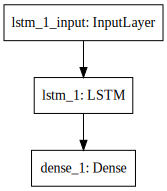

In [10]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
